## Applied - Question 9

We will work with Auto data set (Auto.csv)

#### Import block

In [48]:
import pandas as pd
import os
import dfply
from dfply import *
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from plotnine import *

In [49]:
path = os.path.join(os.getcwd(), 'Auto.csv')
auto = pd.read_csv(path)

auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


We have 9 variables:
  * Quantitative: mpg, cylinders, displacement, horsepower, weight, acceleration, year
  * Qualitative: origin, name

Statistical summary of all the variables:

In [50]:
auto.describe()

,mpg,cylinders,displacement,weight,acceleration,year,origin
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,23.515869,5.458438,193.532746,2970.261965,15.555668,75.994962,1.574307
std,7.825804,1.701577,104.379583,847.904119,2.749995,3.690005,0.802549
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,2223.000000,13.800000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3609.000000,17.100000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


Removing 10th to 85th 

In [51]:
auto2 = auto.drop(auto.index[9:84])
auto2.describe()

,mpg,cylinders,displacement,weight,acceleration,year,origin
count,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000
mean,24.446584,5.366460,186.770186,2931.372671,15.725466,77.136646,1.602484
std,7.897147,1.652674,99.606562,810.712477,2.676686,3.119623,0.818627
min,11.000000,3.000000,68.000000,1649.000000,8.500000,70.000000,1.000000
25%,18.000000,4.000000,98.500000,2211.250000,14.000000,75.000000,1.000000
50%,23.950000,4.000000,144.500000,2792.500000,15.550000,77.000000,1.000000
75%,30.650000,6.000000,250.000000,3494.250000,17.275000,80.000000,2.000000
max,46.600000,8.000000,455.000000,4997.000000,24.800000,82.000000,3.000000


Exploratory Analysis

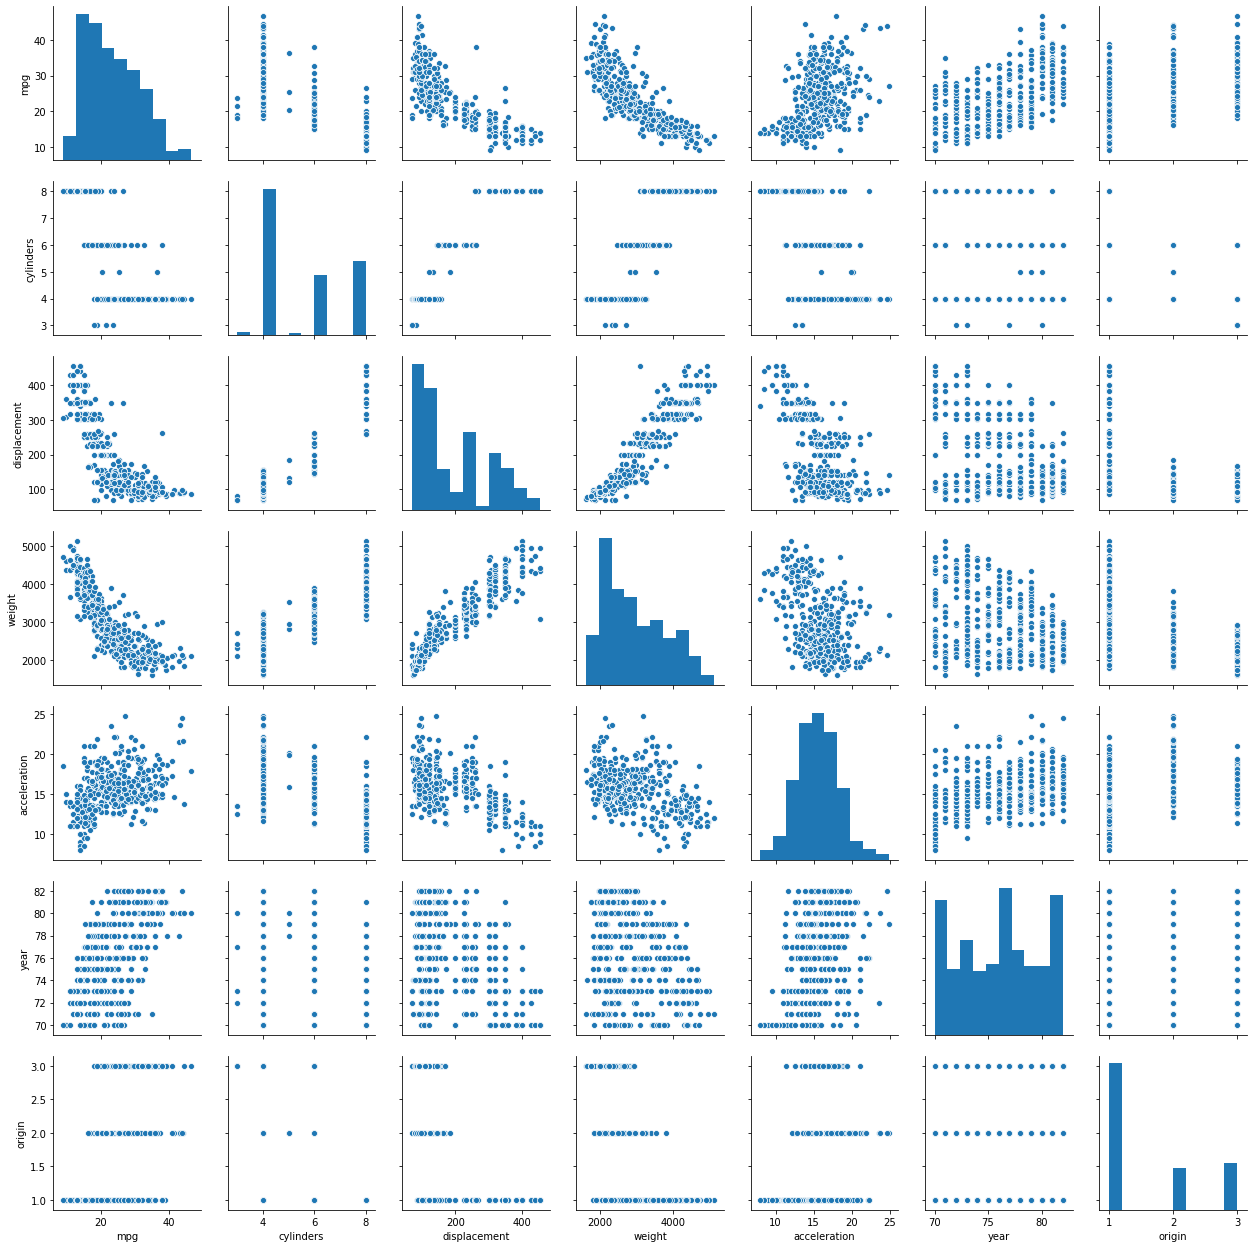

In [52]:
sns.pairplot(data = auto)
plt.show()

Some interesting findings:
  * Look at the origin vs. displacement, we can see that American cars have a much bigger engine
  than European and Japanese counterparts.
  * As expected, mpg has a negative relationship with cylinders, displacement, and weight.
  Interestingly enough, mpg has a positive relationship with acceleration.
  * Lastly, mpg steadily increases over time. 

Most other variables except name correlated to the mpg variables thus are useful in predicting it.
Name variable is too varied (each name has small sample size) and thus should be eliminated.

Fun correlation graphs

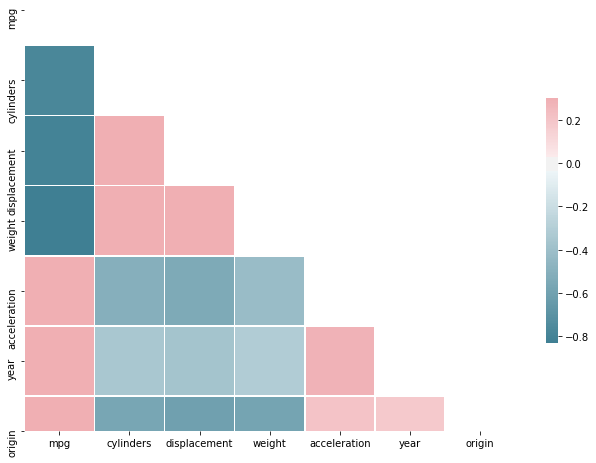

In [53]:
# Compute the correlation matrix
corr = auto.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
    